In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

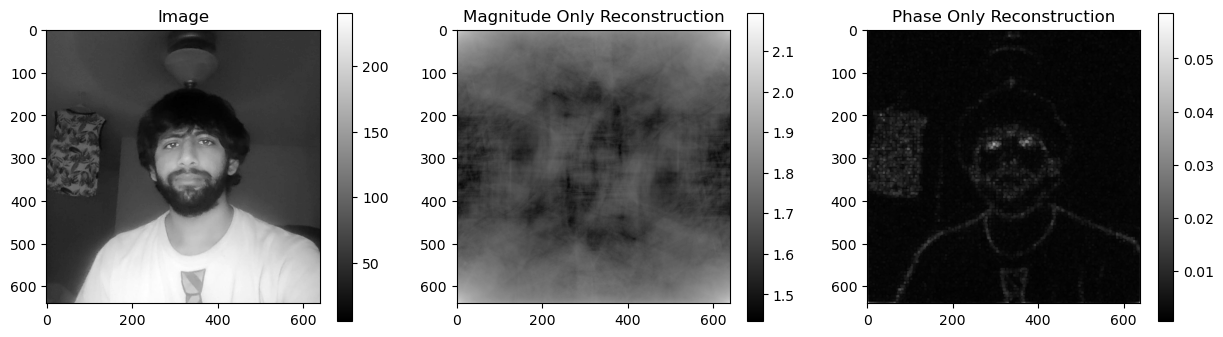

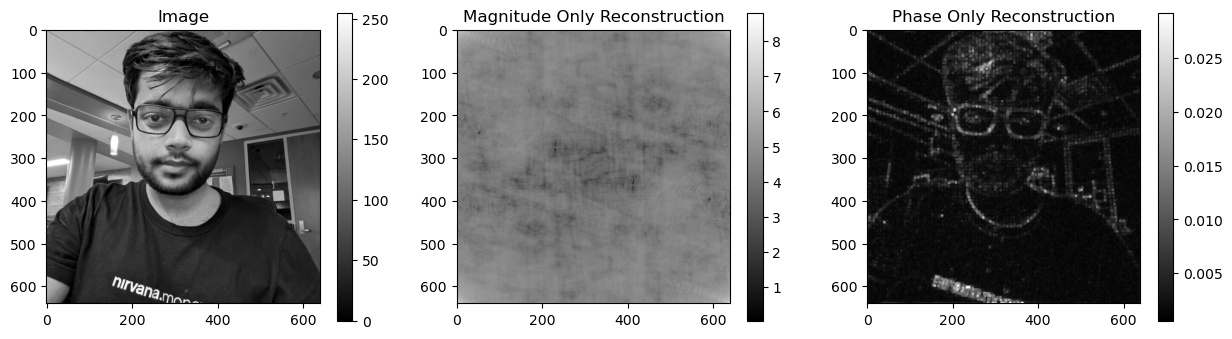

In [15]:
'''
Question 3) Part 1 - Displaying the reconstructed amplitude and phase components of the image. 
'''

IMG1="picA.jpg"
IMG2="picB.jpg"

imgA = cv2.imread(IMG1, cv2.IMREAD_GRAYSCALE)
imgB = cv2.imread(IMG2, cv2.IMREAD_GRAYSCALE)

    
def calculate_magnitude_and_phase(image):
    # Compute the 2D Fourier transform of the image
    f = np.fft.fft2(image)
    
    # Shift the zero-frequency components to the center
    fshift = np.fft.fftshift(f)
    
    # Get the magnitude and phase
    magnitude = np.abs(fshift)
    phase = np.angle(fshift)
    
    return magnitude, phase

def display_reconstructed_images(image, magnitude, phase):
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray')
    plt.title('Image'), plt.colorbar()
    
    plt.subplot(1, 3, 2), plt.imshow(magnitude, cmap='gray')
    plt.title('Magnitude Only Reconstruction'), plt.colorbar()
    
    plt.subplot(1, 3, 3), plt.imshow(phase, cmap='gray')
    plt.title('Phase Only Reconstruction'), plt.colorbar()
    
    plt.show()

def reconstruct_image(magnitude, phase):
    # Calculate representation of the image in complex plane.
    rec_img = magnitude * np.exp(phase * 1j)
    
    # Perform the reverse of fftshift
    rec_ifshifted = np.fft.ifftshift(rec_img)
    
    # Compute the Reverse 2D Fourier transform of the image
    rec_ifft = np.fft.ifft2(rec_ifshifted)
    
    
    return np.abs(rec_ifft)

# Calculate FFT of Image A and seperate into Magnitude and Phase
magnitudeA, phaseA = calculate_magnitude_and_phase(imgA)

# Reconstruct Magnitude only and Phase only images
rec_magnitude_only_imgA = reconstruct_image(magnitudeA, np.zeros(phaseA.shape))
rec_phase_only_imgA = reconstruct_image(np.ones(magnitudeA.shape), phaseA)


# Scaling the Magnitude-only image and dilating the phase-only image for better visibility.
rec_magnitude_only_imgA = np.log(rec_magnitude_only_imgA + 1)

dilating_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
rec_phase_only_imgA = cv2.dilate(rec_phase_only_imgA, dilating_kernel, iterations=2)

# Display reconstructed images of A. Scale the image logarithmically.
display_reconstructed_images(imgA, np.log(rec_magnitude_only_imgA + 1), np.log(rec_phase_only_imgA + 1))



# Calculate FFT of Image B and seperate into Magnitude and Phase
magnitudeB, phaseB = calculate_magnitude_and_phase(imgB)

# Reconstruct Magnitude only and Phase only images
rec_magnitude_only_imgB = reconstruct_image(magnitudeB, np.zeros(phaseB.shape))
rec_phase_only_imgB = reconstruct_image(np.ones(magnitudeB.shape), phaseB)

# Scaling the Magnitude-only image and dilating the phase-only image for better visibility.
rec_magnitude_only_imgB = np.log(rec_magnitude_only_imgB + 1)

dilating_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
rec_phase_only_imgB = cv2.dilate(rec_phase_only_imgB, dilating_kernel, iterations=2)

# Display reconstructed images of B.
display_reconstructed_images(imgB, rec_magnitude_only_imgB, rec_phase_only_imgB)




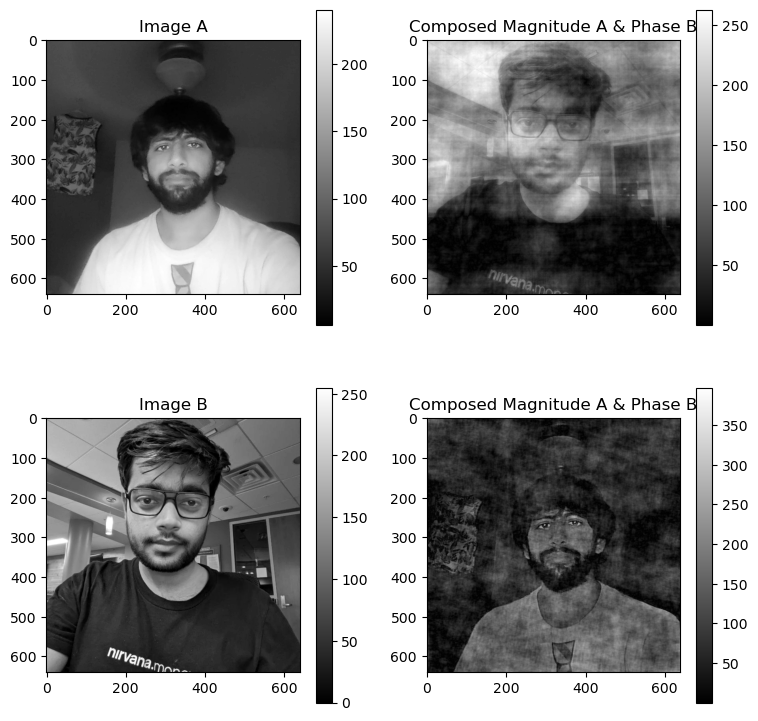

In [16]:
'''
Question 3) Part 2 - Cross-Compositing the amplitude and phase components of the images 
'''

def display_reconstructed_composite_images(imgA, comp_magnitudeA_phaseB, imgB, comp_magnitudeB_phaseA):
    plt.figure(figsize=(9, 9))
    
    plt.subplot(2, 2, 1), plt.imshow(imgA, cmap='gray')
    plt.title('Image A'), plt.colorbar()
    
    plt.subplot(2, 2, 2), plt.imshow(comp_magnitudeA_phaseB, cmap='gray')
    plt.title('Composed Magnitude A & Phase B'), plt.colorbar()
    
    plt.subplot(2, 2, 3), plt.imshow(imgB, cmap='gray')
    plt.title('Image B'), plt.colorbar()
    
    plt.subplot(2, 2, 4), plt.imshow(comp_magnitudeB_phaseA, cmap='gray')
    plt.title('Composed Magnitude A & Phase B'), plt.colorbar()
    
    plt.show()

# Generate the composite images
comp_magnitudeA_phaseB = reconstruct_image(magnitudeA, phaseB)
comp_magnitudeB_phaseA = reconstruct_image(magnitudeB, phaseA)

# Display thte composite images
display_reconstructed_composite_images(imgA, comp_magnitudeA_phaseB, imgB, comp_magnitudeB_phaseA)